In [195]:
import pandas as pd
import os
import numpy as np
import tweepy
import requests
from PIL import Image
from io import BytesIO
import json
import re
import datetime as dt
import matplotlib.pyplot as plt


# Gathering data
   **1. The WeRateDogs Twitter archive.  I dowenload  twitter_archive_enhanced.csv file manualy to the jubeter and then create archive_df by using pd.read_csv**

In [2]:
archive_df=pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**tweet_id**: the unique identifier for each tweet

**in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

**in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID

**timestamp**: time when this Tweet was created

**source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client

**text**: actual UTF-8 text of the status update

**retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

**retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID

**retweeted_status_timestamp**: time of retweet
expanded_urls: tweet URL

**rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10

**rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

**name**: name of the dog

**doggo**: one of the 4 dog "stage"

**floofer**: one of the 4 dog "stage"

**pupper**: one of the 4 dog "stage"

**puppo**: one of the 4 dog "stage"

**2. The tweet image predictions. I dowenload 'image-predictions.tsv' programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv, and then i use it to create 'image_df' Dataframe**

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url[url.rfind("/")+1:-4]
print(filename)

image-predictions


In [5]:
# Dowenload image predaction file programerlly
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respons=requests.get(url)
folder_name = url[url.rfind("/")+1:-4]

if not os.path.exists(folder_name):    
    os.makedirs(folder_name)
    with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb')as file:
        file.write(respons.content)
        
os.listdir(folder_name)  



['image-predictions.tsv']

In [6]:
# dowenlload image predaction data as data frame
tsv_file = open('image-predictions/image-predictions.tsv')
image_df = pd.read_csv(tsv_file, delimiter="\t")

In [7]:
#show the image data frame
image_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**tweet_id**: the unique identifier for each tweet

**jpg_url**: dog's image URL

**img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

**p1** is the algorithm's #1 prediction for the image in the tweet

**p1_conf** is how confident the algorithm is in its #1 prediction 

**p1_dog** is whether or not the #1 prediction is a breed of dog 

**p2** is the algorithm's second most likely prediction 

**p2_conf** is how confident the algorithm is in its #2 prediction 

**p2_dog** is whether or not the #2 prediction is a breed of dog

**p3** is the algorithm's thired most likely prediction 

**p3_conf** is how confident the algorithm is in its #3 prediction 

**p3_dog** is whether or not the #3 prediction is a breed of dog

**3. Tweet data. By Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.
Then i used this file to create status_df dataframe.**

In [8]:
consumer_key = '***************************'
consumer_secret = '***************************'
access_token = '***************************'
access_secret = '***************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [9]:
#Check if it work
exp_tweet = api.get_status(archive_df.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
print(Content)
#Check content of key
content.keys()

TweepError: [{'code': 215, 'message': 'Bad Authentication data.'}]

In [ ]:
#Getting the retweet_count and favorite_count for the test tweet
print(exp_tweet['retweet_count'])
print(exp_tweet['favorite_count'])

In [ ]:
#Creat 'tweet_json.txt' file
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    os.makedirs('tweet_json.txt')
    with open ('tweet_json.txt', 'wb') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)



In [10]:
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create status_df dataFrame it's column is  tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [11]:
status_df.head(10)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"
5,891087950875897856,3261,20562,"[0, 138]"
6,890971913173991426,2158,12041,"[0, 140]"
7,890729181411237888,16716,56848,"[0, 118]"
8,890609185150312448,4429,28226,"[0, 122]"
9,890240255349198849,7711,32467,"[0, 133]"


## Assesing Data

**Type of assesment**:
 
       * Visuale Assesment

       * Programmarly Assesment
**Quality**: issues with content. Low quality data is also known as dirty data.
    
**Tidiness**: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:

        * Each variable forms a column.

        * Each observation forms a row.

        * Each type of observational unit forms a table.

In [12]:
archive_df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
archive_df.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [15]:
archive_df.duplicated().sample(30)

1495    False
559     False
928     False
1998    False
101     False
1551    False
93      False
1257    False
305     False
136     False
882     False
1438    False
110     False
801     False
593     False
378     False
2296    False
339     False
1868    False
1291    False
1105    False
1895    False
2351    False
2054    False
96      False
2049    False
634     False
1843    False
953     False
2299    False
dtype: bool

In [16]:
# Check if there are any retweets data  in archive_df 
len(archive_df[archive_df.retweeted_status_id.isnull() == False])

181

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
# Check Text columns
archive_df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
955,751598357617971201,NaN,NaN,2016-07-09 02:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. A cat got his tongue. 13/10 ador...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751598357...,13,10,Toby,None,None,None,None


In [19]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
status_df.head(10)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"
5,891087950875897856,3261,20562,"[0, 138]"
6,890971913173991426,2158,12041,"[0, 140]"
7,890729181411237888,16716,56848,"[0, 118]"
8,890609185150312448,4429,28226,"[0, 122]"
9,890240255349198849,7711,32467,"[0, 133]"


In [23]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB



# Quality:
 **'archive_df'**
 * retweeted_status_id   
                        * there are some  records in archive_df which are retweets
 
 * tweet_id      
                        * there is some  tweet_id  data in arrchive_df not exist in image_df
 
 * text             
                        * contains untruncated text instead of displayable text
                        * Contain link of tweet which also in expanded_urls column
 
 * source        
                        * unnecessary html tags in source column in place of utility name e.g. <a              href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>
 
 * names         
                        * dog names starting with lowercase characters 
 
 * rating_numerator
                        * some data is less than 10

 * rating_denominator 
                       * some data is not equale  10
 
 * in_reply_to_status_id      
                        * missing data in the coulum  
                        * data type of is float instead of int  
 
 * in_reply_to_user_id       
                        * missing data in the coulum  
                        * data type of is float instead of int  
 * timestamp                
                        * data type of is string instead of datetime 
 
 * retweeted_status_id       
                             * missing data in the coulum  
                             * data type of is float instead of int

 * retweeted_status_user_id  * missing data in the coulum  
                             * data type of is float instead of int  

 * retweeted_status_timestamp  
                             * missing data in the coulum  

 * expanded_urls               
                             * mising data  in the coulum  
 
 * doggo, floofer, pupper and puppo columns has missing data 
 


**Tidness:**
* archive_df table without any duplicates (i.e. retweets) have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped

* doggo, floofer, pupper and puppo columns in archive_df table should be merged into one column named "stage"

* timestamp columns have both time and deat data

* retweet_count and favorite_count columns from status_df (tweet status) table should be joined with archive_df table


#  Data Cleaning

In [24]:
archive_cleaning=archive_df

In [25]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2282,667211855547486208,NaN,NaN,2015-11-19 05:24:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Genevieve. She is a golden retriever c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667211855...,9,10,Genevieve,None,None,None,None


# َQuality
**1.there are some  records in archive_df which are retweets**

**define** 
* Keep only tweet data instead of  retweet data

**code** 

In [26]:
archive_cleaning=archive_cleaning[archive_cleaning.retweeted_status_id.isnull() == True]

**Test**

In [27]:
# Check if there are any records in archive_cleaning which are retweet
len(archive_cleaning[archive_cleaning.retweeted_status_id.isnull() == False])

0

In [28]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1376,701805642395348998,NaN,NaN,2016-02-22 16:27:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please pray for this pupper. Nothing wrong wit...,NaN,NaN,NaN,https://vine.co/v/ivV6Y37mH5Z,11,10,None,None,None,pupper,None


**2.tweet_id      * there is some  tweet_id  data in arrchive_df not exist in image_df**

**define**

* save only data which is in archive_df and image_df and drope anther data

**code**

In [29]:
archive_cleaning=archive_cleaning[archive_cleaning.tweet_id.isin(image_df.tweet_id)]

**test**

In [30]:
len(archive_cleaning[~archive_cleaning.tweet_id.isin(image_df.tweet_id)])

0

In [31]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None


**3.text column   * contains untruncated text instead of displayable text**

**define**

* remove  untruncated text from text colum 

**code**

In [32]:
print(archive_cleaning.iloc[0].text)
print(archive_cleaning.iloc[1].text)
print(archive_cleaning.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [33]:
# merge status_df's display_text_range column to archive_clean to extract text using range values
archive_cleaning = pd.merge(archive_cleaning, status_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [34]:
for i, row in archive_cleaning.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    archive_cleaning.set_value(i, 'text', display_text)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [35]:
archive_cleaning.drop('display_text_range', axis=1, inplace=True)

**Test**

In [36]:
print(archive_cleaning.iloc[0].text)
print(archive_cleaning.iloc[1].text)
print(archive_cleaning.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


In [37]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
943,714214115368108032,NaN,NaN,2016-03-27 22:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Easter from the squad! 🐇🐶 13/10 for all ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714214115...,13,10,None,None,None,None,None


**4. in_reply_to_status_id,in_reply_to_user_id columns and timestamp : has wrong datatype**

**Define**
* in_reply_to_status_id,in_reply_to_user_id columns : convert from float to integer

* timestamp : convert datatype from string to datetime

**Code**

In [38]:
archive_cleaning.in_reply_to_status_id = archive_cleaning.in_reply_to_status_id.fillna(0)
archive_cleaning.in_reply_to_user_id = archive_cleaning.in_reply_to_user_id.fillna(0)

archive_cleaning.in_reply_to_status_id = archive_cleaning.in_reply_to_status_id.astype(np.int64)
archive_cleaning.in_reply_to_user_id = archive_cleaning.in_reply_to_user_id.astype(np.int64)

archive_cleaning.timestamp = pd.to_datetime(archive_cleaning.timestamp)

**Test**

In [39]:
archive_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns, UTC]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns, UT

In [40]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1221,689623661272240129,0,0,2016-01-20 01:41:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's terrified of the stuffed b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,None,None,pupper,None


**5.source   unnecessary html tags in source column in place of utility name e.g. <ahref=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone**

**Define**
* Strip all html anchor tags (i.e. <a..></a>) in source column and retain just the text in between the tags. Convert the datatype from string to categorical.

**Code**

In [41]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
archive_cleaning['source']=archive_cleaning['source'].apply(lambda cw : remove_tags(cw))
archive_cleaning['source']=archive_cleaning['source'].astype(str)

**Test**

In [42]:
archive_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns, UTC]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns, UT

In [43]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
849,730924654643314689,0,0,2016-05-13 00:56:32+00:00,Twitter for iPhone,We only rate dogs. Pls stop sending non-canine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730924654...,9,10,unacceptable,None,None,None,None


**6.names * dog names starting with lowercase characters**
**Define**
* Convert lowercase chaaracters to highercase

**Code**

In [44]:
archive_cleaning['name'][archive_cleaning['name'].str.match('[a-z]+')] = 'None'

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Test**

In [45]:
archive_cleaning.name[archive_cleaning.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

In [46]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1309,684097758874210310,0,0,2016-01-04 19:43:10+00:00,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684097758...,10,10,Lupe,None,None,None,None


**7.expanded_urls          mising data  in the coulum**  

**Define**
* Drope  Null data from the Data

**Code**

In [47]:
archive_cleaning = archive_cleaning.dropna(subset=['expanded_urls'])

**Test**

In [48]:
len(archive_cleaning[archive_cleaning.expanded_urls.isnull()== True ])

0

In [49]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
818,737826014890496000,0,0,2016-06-01 02:00:04+00:00,Twitter for iPhone,This is Remy. He has some long ass ears (proba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737826014...,10,10,Remy,None,None,None,None


**8.rating_denominator: some data is not equale 10**

**Define**
* For Data which has rating_denominator is greater than 10 and divisible by 10, use the quotient as the divisor to divide the rating_numerator. If the  remainder=0 , assign this quotient as the rating_numerator.

* For the rrest of data, check if the text column contains any fraction whose denominator is 10. If it does, change the rating_denominator to 10. Then, change the rating_numerator with the value of numerator  in it.

**Code**


In [50]:
archive_cleaning.rating_numerator.value_counts()


12      450
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [51]:
archive_cleaning.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [52]:
wrong_ratingDenominator = np.logical_or(archive_cleaning['rating_denominator']>10,archive_cleaning['rating_denominator']<10)
wrong_ratingNominator   = np.logical_or(archive_cleaning['rating_numerator']<6,archive_cleaning['rating_numerator']>15)

In [53]:
wrong_ratingDenominator.sum()

18

In [54]:
wrong_ratingNominator.sum()

103

In [55]:
pattern = "\s*(\d+([.]\d+)?([/]\d+))"

def Patterns(x):
    return [m.group(1) for m in re.finditer(pattern, x)]

for i,denomerator in archive_cleaning[archive_cleaning.rating_denominator != 10].iterrows():
    demo = denomerator.rating_denominator
    if demo>10 and demo%10==0:
        div = demo/10
        nom = denomerator.rating_numerator
        
        if nom%div==0:
            archive_cleaning.set_value(i, 'rating_numerator', int(nom/div))
            archive_cleaning.set_value(i, 'rating_denominator', 10)
        
    
        
    else:
        x = Patterns(denomerator.text)
        for ratings in x:
            if ratings.split('/')[1] == '10':
                archive_cleaning.set_value(i, 'rating_numerator', int(round(float(ratings.split('/')[0]))))
                archive_cleaning.set_value(i, 'rating_denominator', 10)
                

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


**Test**

In [56]:
archive_cleaning['rating_denominator'].value_counts()

10    1993
7        1
Name: rating_denominator, dtype: int64

In [57]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1143,695816827381944320,0,0,2016-02-06 03:50:33+00:00,Twitter for iPhone,Here's a dog enjoying a sunset. 11/10 would tr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695816827...,11,10,None,None,None,None,None


**9.rating_numerator: some data is less than 10**

**Define**
* For data in which rating numerator is  less than or equal to 10 or greater than 10 but has a very high value, check if the text have any fraction whose denominator is 10. If it does, change the rating_numerator with the numerator of it.

**Code**

In [58]:
for i, numerator in archive_cleaning[(archive_cleaning.rating_numerator <= 10) | (archive_cleaning.rating_numerator > 14)].iterrows():
    x = Patterns(numerator.text)
    for ratings in x:        
        if ratings.split('/')[1] == '10':
            n = int(round(float(ratings.split('/')[0])))
            if (numerator.rating_numerator == 10 and n > 10) or (numerator.rating_numerator != 10 and n >= 10):
                archive_cleaning.set_value(i, 'rating_numerator', n)
                break

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


**Test**

In [59]:
archive_cleaning['rating_numerator'].value_counts()

12      455
10      421
11      407
13      263
9       152
8        94
7        51
14       37
6        32
5        31
3        19
4        14
2         9
1         4
0         2
420       1
24        1
1776      1
Name: rating_numerator, dtype: int64

In [60]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
465,793210959003287553,0,0,2016-10-31 22:00:04+00:00,Twitter for iPhone,This is Maude. She's the h*ckin happiest wasp ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793210959...,10,10,Maude,None,None,None,None


**10. mising data from doggo,floofer,pupper and puppo cloumns**

**Define :**
* Delet none data from doggo,floofer,pupper and puppo cloumns to repere them for tendensse cleaning
**Code**

In [61]:
Range=archive_cleaning.columns.get_loc('doggo')

archive_cleaning[Range:].replace("None", '',inplace = True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


**Test**

In [62]:
archive_cleaning.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1876,668171859951755264,0,0,2015-11-21 20:59:20+00:00,Twitter for iPhone,This is a Trans Siberian Kellogg named Alfonso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668171859...,7,10,,,,,
654,759447681597108224,0,0,2016-07-30 17:56:51+00:00,Twitter for iPhone,This is Oakley. He has no idea what happened h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,,,,
1314,683828599284170753,0,0,2016-01-04 01:53:37+00:00,Twitter for iPhone,Breathtaking pupper here. Should be on the cov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683828599...,12,10,,,,pupper,


In [63]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1233,688898160958271489,0,0,2016-01-18 01:38:15+00:00,Twitter for iPhone,When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,,,,,


**11. Text :Contain link of tweet which also in expanded_urls column**

**Define**

* As link of tweet is in expanded_urls column so we will remove it from text column

**Code**    

In [64]:
archive_cleaning['text'] = archive_cleaning['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

**Test**

In [65]:
archive_cleaning.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
769,745314880350101504,0,0,2016-06-21 17:58:09+00:00,Twitter for iPhone,This is Sugar. She excels underwater. 12/10 ph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745314880...,12,10,Sugar,,,,
1756,670435821946826752,0,0,2015-11-28 02:55:30+00:00,Twitter for iPhone,Two unbelievably athletic dogs here. Great for...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670435821...,10,10,,,,,
797,740711788199743490,0,0,2016-06-09 01:07:06+00:00,Twitter for iPhone,Here we are witnessing the touchdown of a pupn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740711788...,9,10,,,,,
372,813096984823349248,0,0,2016-12-25 19:00:02+00:00,Twitter for iPhone,This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,,,


In [66]:
archive_cleaning.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
226,836753516572119041,0,0,2017-03-01 01:42:39+00:00,Twitter for iPhone,This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo,,,


In [67]:
print(archive_cleaning['expanded_urls'][50])

https://twitter.com/dog_rates/status/881268444196462592/photo/1


**Tidness:**

**1.archive_df table without any duplicates (i.e. retweets) have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns**

**Define**
* Drope the retweet data  retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns



**Code**

doggo, floofer, pupper and puppo columns in archive_df table should be merged into one column named "stage"
retweet_count and favorite_count columns from status_df (tweet status) table should be joined with archive_df table

In [68]:
archive_cleaning=archive_cleaning.drop(columns='retweeted_status_id')
archive_cleaning=archive_cleaning.drop(columns='retweeted_status_user_id')
archive_cleaning=archive_cleaning.drop(columns='retweeted_status_timestamp')

**Test**

In [69]:
archive_cleaning.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
363,813800681631023104,0,0,2016-12-27 17:36:16+00:00,Twitter for iPhone,This is Sky. She's learning how to roll her R'...,https://twitter.com/dog_rates/status/813800681...,12,10,Sky,,,,
732,749064354620928000,0,0,2016-07-02 02:17:13+00:00,Twitter for iPhone,Meet Winston. He's pupset because I forgot to ...,https://twitter.com/dog_rates/status/749064354...,11,10,Winston,,,,
1956,666454714377183233,0,0,2015-11-17 03:16:00+00:00,Twitter for iPhone,I'll name the dogs from now on. This is Kreggo...,https://twitter.com/dog_rates/status/666454714...,10,10,Kreggory,,,,


**2.doggo, floofer, pupper and puppo columns in archive_df table should be merged into one column named "stage"**

**Define**
* Merge the three columns in one columns 



**Code**

doggo, floofer, pupper and puppo columns in archive_df table should be merged into one column named "stage"
retweet_count and favorite_count columns from status_df (tweet status) table should be joined with archive_df table

In [70]:

archive_cleaning = archive_cleaning.assign(stage =  archive_cleaning.doggo  + archive_cleaning.floofer+ archive_cleaning.pupper.dropna() + archive_cleaning.puppo)

archive_cleaning['stage'] = archive_cleaning.stage.astype('category')


In [71]:
archive_cleaning=archive_cleaning.drop(columns=['doggo','floofer','pupper','puppo'])

**Test**

In [72]:
archive_cleaning.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1050,704480331685040129,0,0,2016-03-01 01:36:14+00:00,Twitter for iPhone,Meet Lucia. She's a Cumulonimbus Floofmallow. ...,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,
1270,686050296934563840,0,0,2016-01-10 05:01:51+00:00,Twitter for iPhone,This is Flávio. He's a Macedonian Poppycock. 9...,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,
1628,672964561327235073,0,0,2015-12-05 02:23:49+00:00,Twitter for iPhone,This is Terry. He's a Toasty Western Sriracha....,https://twitter.com/dog_rates/status/672964561...,10,10,Terry,


In [73]:
archive_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    1994 non-null category
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 173.7+ KB


**3.timestamp columns have both time and date data**

**Define**
* Separate timestamp data in two columns time and Date.



**Code**


In [74]:
archive_cleaning['timestamp']=archive_cleaning.timestamp.astype(str)


archive_cleaning[['Date','Time']] = archive_cleaning['timestamp'].str.split(" ",expand=True)

archive_cleaning['Date']=pd.to_datetime(archive_cleaning['Date'])
archive_cleaning['Time']=pd.to_datetime(archive_cleaning['Time'])
archive_cleaning['Time']=[time.time() for time in archive_cleaning['Time']]

In [75]:
archive_cleaning=archive_cleaning.drop(columns=['timestamp'])

**Test**

In [76]:
archive_cleaning.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,Date,Time
1690,671520732782923777,0,0,Twitter for iPhone,Meet Alejandro. He's an extremely seductive pu...,https://twitter.com/dog_rates/status/671520732...,10,10,Alejandro,,2015-12-01,02:46:33
654,759447681597108224,0,0,Twitter for iPhone,This is Oakley. He has no idea what happened h...,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,,2016-07-30,17:56:51
389,810254108431155201,0,0,Twitter for iPhone,"This is Gus. He likes to be close to you, whic...",https://twitter.com/dog_rates/status/810254108...,12,10,Gus,,2016-12-17,22:43:27


In [77]:
archive_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    1994 non-null category
Date                     1994 non-null datetime64[ns]
Time                     1994 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 189.3+ KB


**4.retweet_count and favorite_count columns from status_df (tweet status) table should be joined with archive_df table**

**Define**

* Separate timestamp data in two columns time and Date.



**Code**


In [78]:
archive_cleaning['retweet_count'] = status_df['retweet_count']
archive_cleaning['favorite_count'] = status_df['favorite_count']

**Test**

In [79]:
archive_cleaning.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,Date,Time,retweet_count,favorite_count
1221,689623661272240129,0,0,Twitter for iPhone,This is Lucy. She's terrified of the stuffed b...,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,pupper,2016-01-20,01:41:08,940,3570
938,714957620017307648,0,0,Twitter for iPhone,This is Curtis. He's an Albino Haberdasher. Te...,https://twitter.com/dog_rates/status/714957620...,10,10,Curtis,,2016-03-29,23:29:14,1109,4283
1970,666345417576210432,0,0,Twitter for iPhone,Look at this jokester thinking seat belt laws ...,https://twitter.com/dog_rates/status/666345417...,10,10,,,2015-11-16,20:01:42,798,1510


**5.The names of columns p1,p2,p3,p1_conf,p2_conf,p3_conf,p1_dog,p2_dog,p3_dog  dosen't descripe it**

**Define**

* cange columns names.


**Code**

In [80]:
image_Copy = image_df
image_Copy.rename(columns={'p1': 'Algorithm_1','p2': 'Algorithm_2','p3': 'Algorithm_3','p1_conf':'algor1_Confedance','p2_conf':'algor2_Confedance','p3_conf':'algor3_Confedance','p1_dog':'algor1_result','p2_dog':'algor2_result','p3_dog':'algor3_result'}, inplace=True)


**Test**

In [81]:
image_Copy.sample(3)

,tweet_id,jpg_url,img_num,Algorithm_1,algor1_Confedance,algor1_result,Algorithm_2,algor2_Confedance,algor2_result,Algorithm_3,algor3_Confedance,algor3_result
1639,807010152071229440,https://pbs.twimg.com/media/CzMTcZoXUAEKqEt.jpg,1,golden_retriever,0.610807,True,Irish_setter,0.213642,True,Welsh_springer_spaniel,0.031887,True
1678,813202720496779264,https://pbs.twimg.com/media/C0kTjqIXgAAqpRi.jpg,1,cocker_spaniel,0.701852,True,golden_retriever,0.120345,True,Labrador_retriever,0.036320,True
1218,743609206067040256,https://pbs.twimg.com/media/ClHUkhQWAAAy7Yj.jpg,3,Weimaraner,0.982794,True,American_Staffordshire_terrier,0.004766,True,Great_Dane,0.003432,True


In [82]:
image_df.sample(3)

,tweet_id,jpg_url,img_num,Algorithm_1,algor1_Confedance,algor1_result,Algorithm_2,algor2_Confedance,algor2_result,Algorithm_3,algor3_Confedance,algor3_result
67,667177989038297088,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,Labrador_retriever,0.719510,True,Chesapeake_Bay_retriever,0.122019,True,Newfoundland,0.038828,True


**6. Every algorethm has three  column**

**Define:**
* Add algorithms in one column name breeed , add the confedance of these algorithm in column breed_confedance,and add the type of doges in Dog_type column 

**Code**

In [134]:
image_Copy['breed']=np.nan
image_Copy['breed_confedance']=np.nan
image_Copy['Dog_type']=np.nan

for i,predact in image_df.iterrows():
    #If only algorithm_1 is true
    if predact.algor1_result and ~predact.algor2_result and ~predact.algor3_result:
        image_Copy['breed'][i] =  'Algorithm_1'
        image_Copy['breed_confedance'][i] =  predact.algor1_Confedance
        image_Copy['breed_confedance'][i] =  predact.algor1_Confedance
        image_Copy['Dog_type'][i] =  predact.Algorithm_1
   
    #If only algorithm_2 is true
    elif ~predact.algor1_result and predact.algor2_result and ~predact.algor3_result:
        image_Copy['breed'][i] =  'Algorithm_2'
        image_Copy['breed_confedance'][i] =  predact.algor2_Confedance  
        image_Copy['Dog_type'][i] =  predact.Algorithm_2
    
    #If only algorithm_3 is true
    elif ~predact.algor1_result and ~predact.algor2_result and predact.algor3_result:
        image_Copy['breed'][i] =  'Algorithm_3'
        image_Copy['breed_confedance'][i] =  predact.algor3_Confedance  
        image_Copy['Dog_type'][i] =  predact.Algorithm_3
        
    #If there is more on algorithm is true 
    else :
        # All algorithms predaction is true but algorithm 1 has gigh confedance
        if (predact.algor1_result and predact.algor2_result and predact.algor3_result)and (predact.algor1_Confedance>predact.algor2_Confedance and predact.algor1_Confedance>predact.algor3_Confedance ):
            image_Copy['breed'][i] =  'Algorithm_1'
            image_Copy['breed_confedance'][i] =  predact.algor1_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_1
        
        # Only algorithm 1&2 has true predaction but algorithm 1 has high confedance
        elif (predact.algor1_result and predact.algor2_result and ~predact.algor3_result)and (predact.algor1_Confedance>predact.algor2_Confedance):
            image_Copy['breed'][i] =  'Algorithm_1'
            image_Copy['breed_confedance'][i] =  predact.algor1_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_1
        
        # Only algorithm 1&3 has true predaction but algorithm 1 has high confedance
        elif (predact.algor1_result and ~predact.algor2_result and predact.algor3_result)and (predact.algor1_Confedance > predact.algor3_Confedance):
            image_Copy['breed'][i] =  'Algorithm_1'
            image_Copy['breed_confedance'][i] =  predact.algor1_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_1
        
        # All algorithms predaction is true but algorithm 2 has gigh confedance    
        elif (predact.algor1_result and predact.algor2_result and predact.algor3_result)and (predact.p2_conf>predact.p1_conf and predact.p2_conf>predact.p3_conf ):
            image_Copy['breed'][i] =  'Algorithm_2'
            image_Copy['breed_confedance'][i] =  predact.algor2_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_2
       
        # Only algorithm 1&2 has true predaction but algorithm 2 has high confedance
        elif (predact.algor1_result and predact.algor2_result and ~predact.algor3_result)and (predact.algor1_Confedance < predact.algor2_Confedance):
            image_Copy['breed'][i] =  'Algorithm_2'
            image_Copy['breed_confedance'][i] =  predact.algor2_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_2
    
        # Only algorithm 2&3 has true predaction but algorithm 2 has high confedance
        elif (~predact.algor1_result and predact.algor2_result and predact.algor3_result)and (predact.algor2_Confedance > predact.algor3_Confedance):
            image_Copy['breed'][i] =  'Algorithm_2'
            image_Copy['breed_confedance'][i] =  predact.algor2_Confedance
            image_Copy['Dog_type'][i] =  predact.Algorithm_2
        
        # All algorithms predaction is true but algorithm 3 has gigh confedance
        elif (predact.algor1_result and predact.algor2_result and predact.algor3_result)and (predact.algor3_Confedance>predact.algor1_Confedance and predact.algor3_Confedance>predact.algor2_Confedance ):
            image_Copy['breed'][i] =  'Algorithm_3'
            image_Copy['breed_confedance'][i] =  predact.algor3_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_3
        
        # Only algorithm 1&3 has true predaction but algorithm 3 has high confedance
        elif (predact.algor1_result and ~predact.algor2_result and predact.algor3_result)and (predact.algor1_Confedance < predact.algor3_Confedance):
            image_Copy['breed'][i] =  'Algorithm_3'
            image_Copy['breed_confedance'][i] =  predact.algor3_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_3
        
        # Only algorithm 2&3 has true predaction but algorithm 3 has high confedance
        elif (~predact.algor1_result and predact.algor2_result and predact.algor3_result)and (predact.algor2_Confedance < predact.algor3_Confedance):
            image_Copy['breed'][i] =  'Algorithm_3'
            image_Copy['breed_confedance'][i] =  predact.algor3_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_3
        
        
        # All algorithms predaction is False but algorithm 1 has gigh confedance    
        elif (~predact.algor1_result and ~predact.algor2_result and ~predact.algor3_result)and (predact.algor1_Confedance>predact.algor2_Confedance and predact.algor1_Confedance>predact.algor3_Confedance ):
            image_Copy['breed'][i] =  'Algorithm_1'
            image_Copy['breed_confedance'][i] =  predact.algor1_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_1
        
        # All algorithms predaction is False but algorithm 2 has gigh confedance    
        elif (~predact.algor1_result and ~predact.algor2_result and ~predact.algor3_result)and (predact.algor2_Confedance>predact.algor1_Confedance and predact.algor2_Confedance>predact.algor3_Confedance ):
            image_Copy['breed'][i] =  'Algorithm_2'
            image_Copy['breed_confedance'][i] =  predact.algor2_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_2
       
        # All algorithms predaction is False but algorithm 3 has gigh confedance    
        else :  
            image_Copy['breed'][i] =  'Algorithm_3'
            image_Copy['breed_confedance'][i] =  predact.algor3_Confedance 
            image_Copy['Dog_type'][i] =  predact.Algorithm_3
    

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\DELL\Anaconda3\lib\

In [107]:
image_Copy=image_Copy.drop(columns=['Algorithm_1','algor1_Confedance','algor1_result','Algorithm_2','algor2_Confedance','algor2_result','Algorithm_3','algor3_Confedance','algor3_result'])

**Test**

In [108]:
image_Copy.sample(10)


,tweet_id,jpg_url,img_num,breed,breed_confedance,Dog_type
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Algorithm_1,0.530104,Lakeland_terrier
379,673270968295534593,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,1,Algorithm_1,0.610453,Shih-Tzu
1359,760893934457552897,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Algorithm_1,0.113992,Blenheim_spaniel
1823,834931633769889797,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,1,Algirithm_2,0.196476,soft-coated_wheaten_terrier
745,687494652870668288,https://pbs.twimg.com/media/CYp4vFrVAAEs9AX.jpg,1,Algorithm_1,0.391471,Rottweiler
129,668286279830867968,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,1,Algorithm_1,0.215944,golden_retriever
929,702932127499816960,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1,Algirithm_1,0.410710,wallaby
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,Algirithm_2,0.128128,Labrador_retriever
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Algorithm_1,0.718944,Chihuahua
1243,747219827526344708,https://pbs.twimg.com/media/Cl6odlVWQAIy5uk.jpg,2,Algorithm_1,0.548018,Shetland_sheepdog


**7. Merge breed column in archive_cleaning**

**Define:**
    * Merge breed column ,breed_confedance,and Dog_type  in archive_cleaning
**Code**

In [164]:
archive_cleaning['breed']= image_Copy['breed']
archive_cleaning['breed_confedance']= image_Copy['breed_confedance']
archive_cleaning['Dog_type']= image_Copy['Dog_type']

**Test**

In [166]:
archive_cleaning.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,Date,Time,retweet_count,favorite_count,breed,breed_confedance,Dog_type
1632,672877615439593473,0,0,Twitter for iPhone,This is Oscar. He's getting bombarded with the...,https://twitter.com/dog_rates/status/672877615...,8,10,Oscar,,2015-12-04,20:38:19,239,1369,Algorithm_1,0.248926,Siberian_husky
1025,706538006853918722,0,0,Twitter for iPhone,"This is Oliver (pronounced ""Ricardo""). He's a ...",https://twitter.com/dog_rates/status/706538006...,11,10,Oliver,,2016-03-06,17:52:42,931,3904,Algorithm_1,0.948617,soft-coated_wheaten_terrier


In [86]:
status_df.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
2313,666691418707132416,51,196,"[0, 99]"
725,782598640137187329,2184,8694,"[0, 108]"
365,828801551087042563,3901,0,"[0, 140]"
1013,747103485104099331,4548,10534,"[0, 113]"
416,822489057087389700,7390,20083,"[0, 94]"


# Store Data

In [167]:
# Store Dataframe in csv files
archive_cleaning.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')


# Analyzing Data 

In [168]:
# Check Datatype of all data
archive_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    1994 non-null category
Date                     1994 non-null datetime64[ns]
Time                     1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
breed                    1994 non-null object
breed_confedance         1994 non-null float64
Dog_type                 1994 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(7), object(7)
memory usage: 347.2+ KB


In [169]:
image_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null int64
breed               2075 non-null object
breed_confedance    2075 non-null float64
Dog_type            2075 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 97.4+ KB


In [170]:
# See dogs names which is popular use 
n=10
archive_cleaning.name.value_counts()[:n].index.tolist()

['',
 'Charlie',
 'Oliver',
 'Cooper',
 'Lucy',
 'Penny',
 'Tucker',
 'Winston',
 'Sadie',
 'Daisy']

In [171]:
#
archive_cleaning.stage.value_counts()

                     1677
pupper                203
doggo                  62
puppo                  21
NoneNoneNoneNone       11
doggopupper             9
floofer                 7
doggopuppo              1
doggofloofer            1
doggoNoneNoneNone       1
NoneNoneNonepuppo       1
Name: stage, dtype: int64

In [172]:
# Counts of each source for tweet
archive_cleaning.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [173]:
# Description  of rating_numerator data  
archive_cleaning.rating_numerator.describe()

count    1994.000000
mean       11.666499
std        40.639082
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [174]:
# Description of retweet_count,favorite_count
archive_cleaning[['retweet_count' , 'favorite_count']].describe()

,retweet_count,favorite_count
count,1994.000000,1994.000000
mean,3625.359077,9292.671013
std,5589.735908,12375.770926
min,0.000000,0.000000
25%,896.000000,2323.000000
50%,1896.000000,4523.000000
75%,4075.000000,11898.750000
max,79515.000000,132810.000000


In [175]:
df=archive_cleaning.groupby('stage').mean()
df[['rating_numerator','retweet_count', 'favorite_count']]

,rating_numerator,retweet_count,favorite_count
stage,,,
,11.771020,3493.092427,8774.323196
NoneNoneNoneNone,12.818182,7070.636364,32710.363636
NoneNoneNonepuppo,13.000000,8538.000000,38818.000000
doggo,11.854839,5131.000000,15113.177419
doggoNoneNoneNone,14.000000,7711.000000,32467.000000
doggofloofer,11.000000,37911.000000,0.000000
doggopupper,11.000000,3695.888889,6471.888889
doggopuppo,13.000000,1195.000000,9094.000000
floofer,12.000000,3679.000000,12600.428571


In [176]:
# You see how many times each algorethm was correct
image_Copy.breed.value_counts()

Algorithm_1    1856
Algorithm_2     155
Algorithm_3      64
Name: breed, dtype: int64

In [177]:
#Most frequent doges type
image_Copy.Dog_type.value_counts().head(10)

golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
pug                    65
toy_poodle             52
chow                   51
Samoyed                46
Pomeranian             42
cocker_spaniel         34
Name: Dog_type, dtype: int64

In [178]:
archive_cleaning[['retweet_count' , 'favorite_count','Time','Date']].sort_values(by=['retweet_count' , 'favorite_count'])

,retweet_count,favorite_count,Time,Date
290,0,150,01:09:42,2017-02-01
1293,2,52,00:59:40,2016-01-07
341,3,72,01:00:41,2017-01-07
112,3,121,00:50:50,2017-05-18
273,3,197,01:00:22,2017-02-07
...,...,...,...,...
816,52360,0,00:32:39,2016-06-02
1077,52360,75163,02:57:08,2016-02-22
259,56625,0,17:17:22,2017-02-14
533,56625,107015,16:07:23,2016-09-28


# Visulaizing Data

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  """


Text(0.5, 1.0, 'Rating of activation at the page')

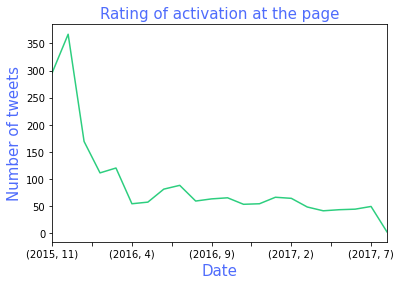

In [239]:
# Number of tweets per year and month


date=archive_cleaning.tweet_id.groupby([archive_cleaning['Date'].dt.year,archive_cleaning['Date'].dt.month]).count()
Plt=date.plot('line',color='#2DCE7F')
Plt.set_ylabel('Number of tweets',color='#4F6CFC', fontsize=15)
Plt.set_xlabel('Date',color='#4F6CFC', fontsize=15)
Plt.set_title('Rating of activation at the page',color='#4F6CFC', fontsize=15)



C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  after removing the cwd from sys.path.


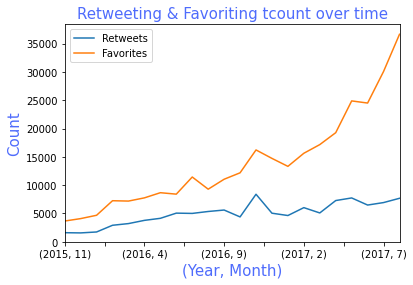

In [231]:
#Retweeting & Favoriting tcount over time
plt.subplots(1, sharex=True)
archive_cleaning.retweet_count.groupby([archive_cleaning['Date'].dt.year,archive_cleaning['Date'].dt.month]).mean().plot('line')
archive_cleaning.favorite_count.groupby([archive_cleaning['Date'].dt.year,archive_cleaning['Date'].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting & Favoriting tcount over time',color='#4F6CFC', fontsize=15)
plt.ylabel('Count',color='#4F6CFC', fontsize=15)
plt.xlabel('(Year, Month)',color='#4F6CFC', fontsize=15)
plt.legend(('Retweets', 'Favorites'))


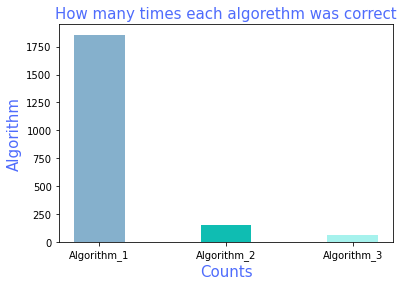

In [230]:
# The algoeithm how is secessfule most

y = image_Copy.breed.value_counts()
x = image_Copy.breed.value_counts().index.tolist()


plt.bar(x, y,color=['#85B0CC','#0FBDB2','#A6F2ED'],width=0.4)

plt.ylabel('Algorithm',color='#4F6CFC', fontsize=15)
plt.xlabel('Counts',color='#4F6CFC', fontsize=15)
plt.title('How many times each algorethm was correct',color='#4F6CFC', fontsize=15)
plt.show()



C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


Text(0.5, 1.0, 'Most frequent doges type')

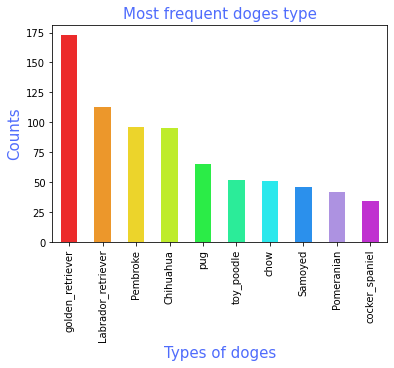

In [238]:

#Most frequent doges type
data=image_Copy.Dog_type.value_counts().head(10)

#date=archive_cleaning.tweet_id.groupby([archive_cleaning['Date'].dt.year,archive_cleaning['Date'].dt.month]).count()
Plt=data.plot('bar',color=['#EC2B2B','#EC972B','#ECD42B','#BEEC2B','#2BEC47','#2BEC99','#2BE8EC','#2B90EC','#AD92E1','#C031D0'])
Plt.set_ylabel('Counts',color='#4F6CFC', fontsize=15)
Plt.set_xlabel('Types of doges',color='#4F6CFC', fontsize=15)
Plt.set_title('Most frequent doges type',color='#4F6CFC', fontsize=15)


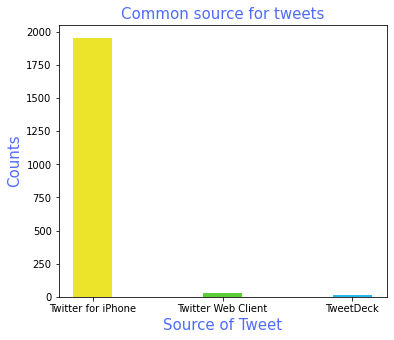

In [229]:

#Common source for tweets
plt.figure(figsize=(20, 5))


names=archive_cleaning.source.value_counts().index.tolist()
plt.subplot(131)
plt.bar(names, archive_cleaning.source.value_counts(),width=0.3,color=['#ECE32B','#5BCD36','#2BB6EC'])

plt.ylabel('Counts',color='#4F6CFC', fontsize=15)
plt.xlabel('Source of Tweet',color='#4F6CFC', fontsize=15)
plt.title('Common source for tweets',color='#4F6CFC', fontsize=15)
plt.show()



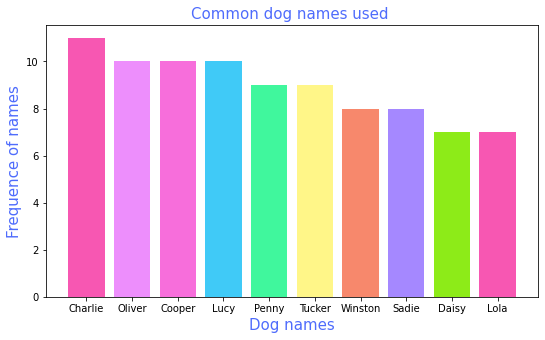

In [228]:
#Common dogs names 
n=11
plt.figure(figsize=(30, 5))
plt.subplot(131)
plt.bar(archive_cleaning.name.value_counts()[1:n].index.tolist(), archive_cleaning.name.value_counts()[1:n],color=['#F757B2','#ED8EFC','#F76EDB','#40CAF7','#40F79D','#FFF688','#F7886C','#A588FF','#8DEB18'])

plt.ylabel('Frequence of names',color='#4F6CFC', fontsize=15)
plt.xlabel('Dog names',color='#4F6CFC', fontsize=15)
plt.title('Common dog names used ',color='#4F6CFC', fontsize=15)
plt.show()



<Figure size 1440x1080 with 0 Axes>

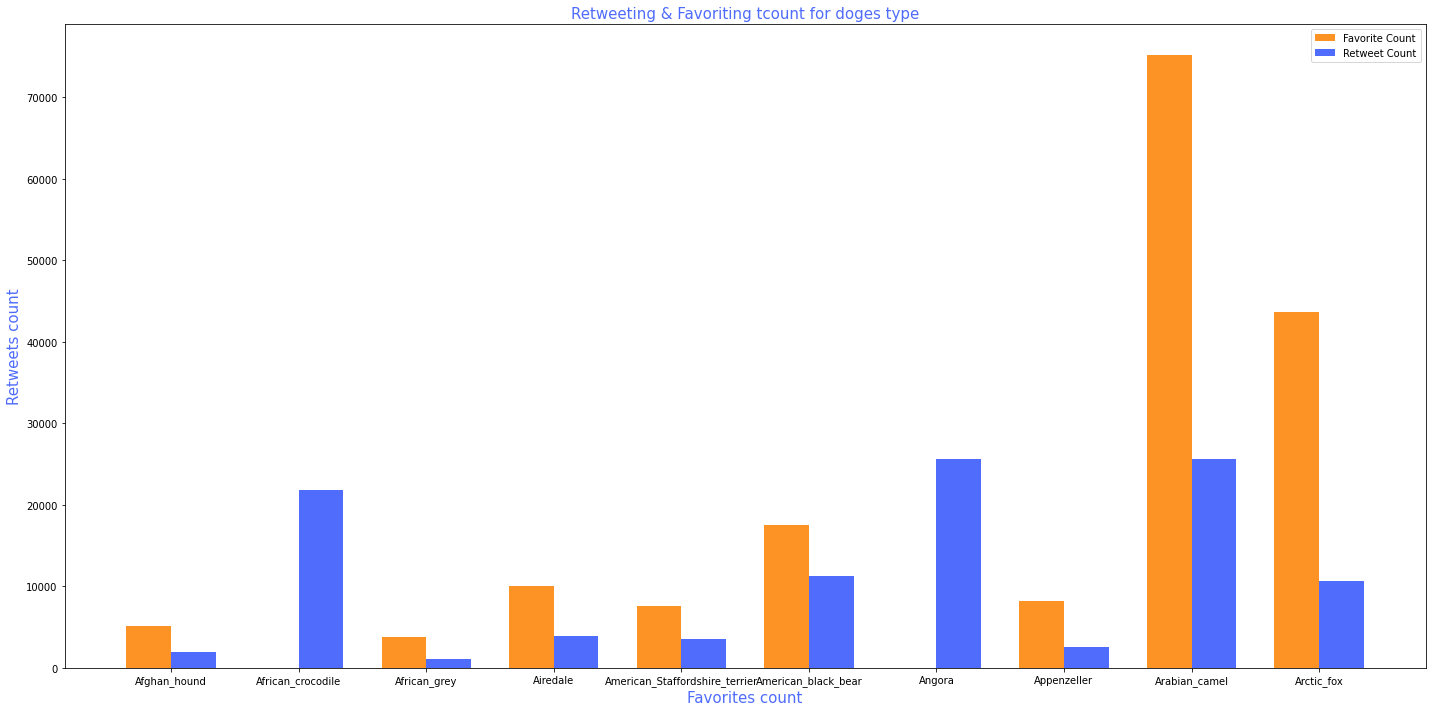

In [243]:

# Counts of 'retweet_count' , 'favorite_count'  according to doges type

import matplotlib
df= archive_cleaning.groupby('Dog_type')[['retweet_count','favorite_count']].mean()[:10]



x = np.arange(len(df.index))
width=0.35
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots(figsize=(20,10))

likes = ax.bar(x - width/2, df['favorite_count'].tolist(), width,color ='#FC9324' , label='favorite count'.title())
retweets = ax.bar(x + width/2, df['retweet_count'].tolist(), width,color = '#4F6CFC',label='retweet count'.title())

ax.set_xticks(x)
ax.set_xticklabels(df.index)
ax.legend()

ax.set_xlabel('Favorites count',color='#4F6CFC', fontsize=15)
ax.set_ylabel('Retweets count',color='#4F6CFC', fontsize=15)
ax.set_title('Retweeting & Favoriting tcount for doges type',color='#4F6CFC', fontsize=15)

ax.legend()
fig.tight_layout()